## Binning Numerical

### Ejemplos de ingeniería de funciones: agrupación de funciones numéricas

La ingeniería de funciones se centra en utilizar las variables que ya están presentes en su conjunto de datos para crear funciones adicionales que (con suerte) representen mejor la estructura subyacente de sus datos.

Por ejemplo, el rendimiento de su modelo puede beneficiarse al agrupar características numéricas. Básicamente, esto significa dividir características continuas u otras características numéricas en grupos distintos. Al aplicar el conocimiento del dominio, es posible que pueda diseñar categorías y características que enfaticen mejor las tendencias importantes en sus datos.

En esta publicación, analizaremos tres métodos diferentes para agrupar características numéricas con ejemplos específicos usando NumPy y Pandas. Diseñaremos funciones a partir de un conjunto de datos con información sobre la demografía y la participación de los votantes. He seleccionado 2 variables numéricas para trabajar:

1. edad: la edad de un votante registrado al final del año electoral
2. año_nacimiento: el año en que nació un votante registrado

Si desea comenzar a aplicar estos métodos a sus propios proyectos, solo deberá asegurarse de tener instalados NumPy y Pandas y luego importar ambos.

### Usando np.where() para indicar umbrales


Puede resultar extraño pensar en ello, pero indicar si cada instancia (en este caso, cada votante registrado) cumple un determinado umbral es un tipo de agrupación.

Por ejemplo, imaginemos que intentamos predecir si cada votante registrado votó en las elecciones. Tal vez sospechemos que los votantes más jóvenes tendrán más probabilidades de acudir a las urnas si es la primera vez que tienen derecho a votar en una elección presidencial. Dado que la edad legal para votar es 18 años, cualquier persona menor de 22 años durante la elección presidencial actual no habría podido votar en la elección presidencial anterior.

Podemos crear una variable indicadora para este umbral usando np.where() que toma 3 argumentos:
1. Una condición
2. Qué devolver si se cumple la condición
3. Qué devolver si no se cumple la condición




El siguiente código crea una nueva característica, first_pres_elec, basada en la edad de un individuo:

In [3]:
import pandas as pd
import numpy as np

df['first_pres_elec'] = np.where(df['age']< 22, 1, 0)

La condición que estamos comprobando es si el individuo tiene menos de 22 años. Si están por debajo de ese umbral, np.where() devuelve un 1 porque esta fue la primera elección presidencial en la que eran elegibles para votar. Si no, se devuelve 0. A partir de nuestra era de variable continua, hemos creado una nueva variable categórica binaria.

Quizás también tengamos motivos para sospechar que las personas mayores tenían más o menos probabilidades de acudir a votar. Si es así, es posible que deseemos llamar la atención de nuestro modelo sobre este umbral creando otro indicador de umbral:

df['senior'] = np.where(df['age']>=65, 1, 0)

Ahora hemos creado dos indicadores de umbral que dividen la distribución de la edad de los votantes como se muestra a continuación. Las personas más jóvenes que recientemente son elegibles para votar en una elección presidencial están resaltadas en rojo y las personas mayores están resaltadas en amarillo.

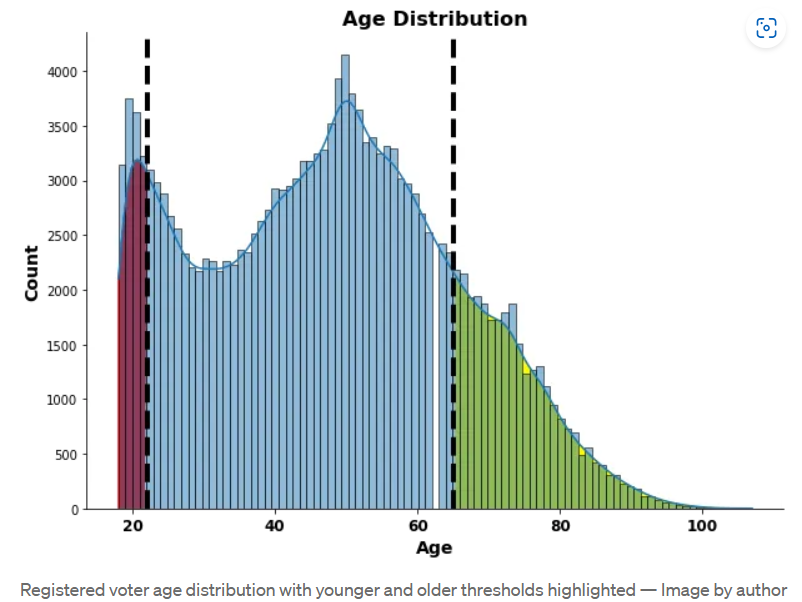

### Aplicar una función personalizada con apply()

Podría tener sentido dividir a nuestros votantes registrados en generaciones según su año de nacimiento, ya que esto a menudo parece estar muy relacionado con la política de una persona. Una forma de hacerlo es escribir nuestra propia función personalizada que delinee los límites para cada generación.

A continuación se muestra una forma en que podríamos escribir una función personalizada de este tipo:

In [7]:
## Define function for grouping into generation categories by birth year
def get_gen_grp(birth_year):
    
    if birth_year < 1946:
        return 'Greatest-Silent' # "El más silencioso"
    
    elif (birth_year > 1945) & (birth_year < 1965):
        return 'Boomer'
    
    elif (birth_year > 1964) & (birth_year < 1981):
        return 'GenX'
    
    elif (birth_year > 1980) & (birth_year < 1997):
        return 'Millennial'
    
    elif birth_year > 1996:
        return 'GenZ'
    
    else:
        return 'Missing'

Y luego use la aplicación de Pandas () para crear una nueva característica basada en la variable año_nacimiento original:

df['generation'] = df['birth_year'].apply(get_gen_grp)

Ahora nuestros votantes registrados están divididos en cinco categorías discretas y significativas. Decidí combinar las 2 generaciones más antiguas (generaciones más grandes y silenciosas) para no crear 2 categorías raras en las que cada una represente solo una porción muy pequeña de la población.

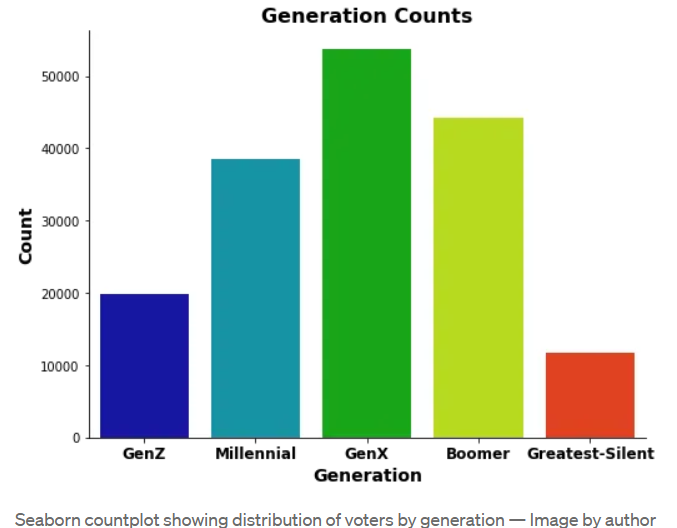

# Definición de Bins con pd.cut()

También podemos crear los mismos Bins de generación usando pd.cut() en lugar de escribir nuestra propia función y aplicarla. Aún necesitaremos definir las etiquetas apropiadas para cada grupo, así como los bordes del contenedor (cortar los años de nacimiento).

## Bin registered voters into generation groups using pd.cut

# Define group labels
cut_labels = ['Greatest-Silent', 'Boomer', 'GenX', 'Millennial', 'GenZ']

# Define bin edges
cut_bins = [0, 1945, 1964, 1980, 1996, 2100]

# Create a new column grouping birth_year into generations
df['cut_generation'] = pd.cut(df['birth_year'], bins=cut_bins, labels=cut_labels)

En la última línea, creamos nuestra nueva función proporcionando a pd.cut() la columna que queremos agrupar en categorías, los bins que queremos y cómo etiquetar cada categoría agrupada.

En lugar de agrupar por generación, podríamos crear rápidamente una gama y suministrarla como nuestros bordes de contenedor. Por ejemplo, si pensáramos que sería significativo agrupar la edad por década, podríamos lograrlo con lo siguiente:

## Bin registered voters into generation groups using pd.cut
# Define bin edges
cut_bins = np.arange(10, 111, 10)

# Create a new column grouping birth_year into generations
df['cut_age'] = pd.cut(df['age'], bins=cut_bins)

La primera línea define un rango que comienza en 10 y continúa hasta, pero sin incluir 110, aumentando en 10 en cada paso. La segunda línea utiliza ese rango como bordes de contenedor para discretizar a los votantes registrados por edad en los siguientes grupos:



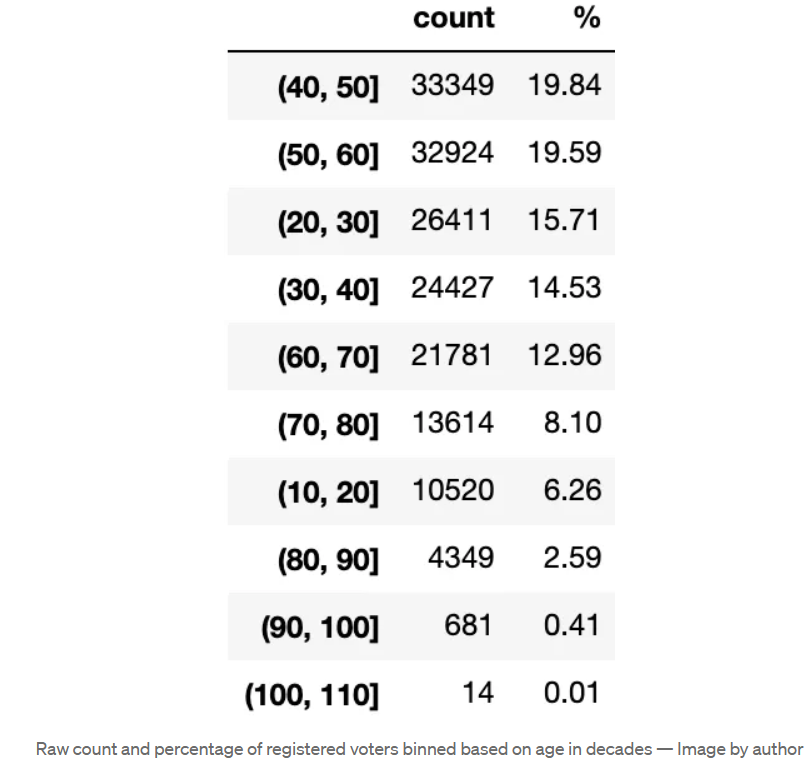

La primera fila muestra que 33,349 o el 19.84% de nuestros votantes tienen más de 40 años. El paréntesis indica que el 40 es inclusivo, mientras que el corchete indica que el 50 está excluido de la papelera. Para realizar un seguimiento más fácil de lo que significa cada bin, podríamos introducir las siguientes etiquetas en pd.cut():


## Bin registered voters into generation groups using pd.cut
# Define group labels
cut_labels = ['Teens', "20's", "30's", "40's", "50's", "60's", "70's", "80's", "90's", "100's"]

# Define bin edges
cut_bins = np.arange(10, 111, 10)

# Create a new column grouping birth_year into generations
df['cut_age'] = pd.cut(df['age'], bins=cut_bins, labels=cut_labels)

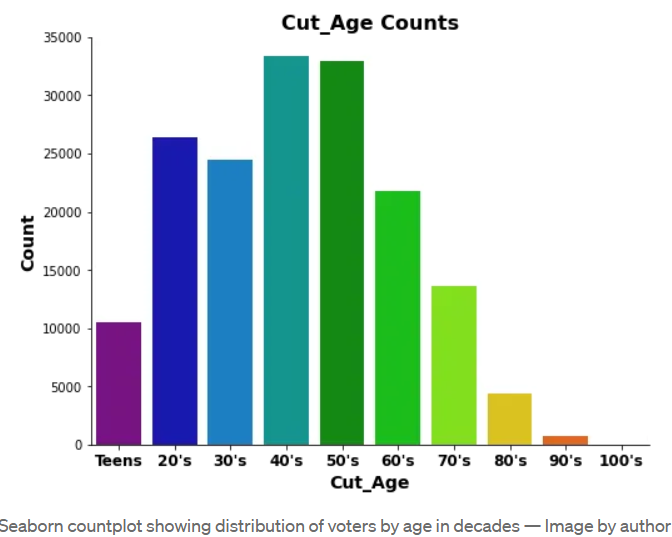

Recapitulando
Cubrimos:

¿Qué significa agrupar entidades numéricas?
1 método para crear un indicador de umbral (np.where())
2 métodos para agrupar características numéricas en grupos (función personalizada con Pandas apply() y definir bordes de bin con pd.cut())

## Binning Categorical

Ejemplos de ingeniería de características: Agrupación en bins de características categóricas
Cómo usar NumPy o Pandas para agrupar rápidamente características categóricas.

Trabajar con datos categóricos con fines de aprendizaje automático (ML) a veces puede presentar problemas complicados. En última instancia, estas características deben codificarse numéricamente de alguna manera para que un algoritmo de ML pueda trabajar con ellas.

También querrá considerar métodos adicionales para preparar las características categóricas para el modelado. Por ejemplo, el rendimiento del modelo puede beneficiarse de la discretización de características categóricas. Básicamente, esto significa agrupar varias categorías en una sola categoría. Al aplicar el conocimiento del dominio, es posible que pueda diseñar nuevas categorías y características que representen mejor la estructura de sus datos.

En esta publicación, cubriremos brevemente por qué las características categóricas de agrupación pueden ser beneficiosas. A continuación, repasaremos tres métodos diferentes para agrupar características categóricas con ejemplos específicos utilizando NumPy y Pandas.

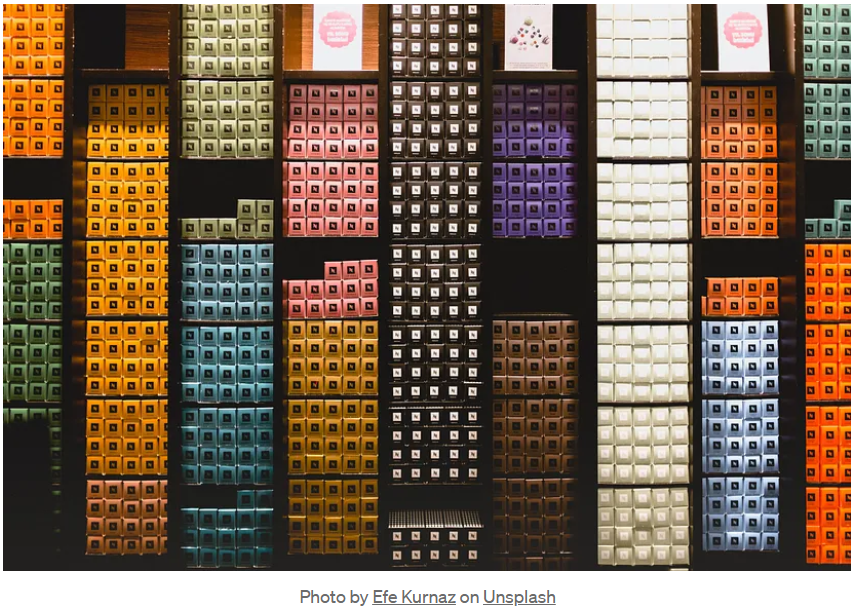

¿Por qué categorías de contenedores?

Con las características categóricas, es posible que encuentre problemas con etiquetas raras, categorías o grupos que son extremadamente poco comunes dentro de su conjunto de datos. Este problema a menudo está relacionado con características que tienen una alta cardinalidad, en otras palabras, muchas categorías diferentes.

Tener demasiadas categorías, y especialmente categorías raras, conduce a un conjunto de datos ruidoso. Puede ser difícil para un algoritmo de ML cortar este ruido y aprender de las señales más significativas en los datos.

La alta cardinalidad también puede exacerbar la maldición de la dimensionalidad si elige codificar en caliente sus características categóricas. Si la variable original tiene 50 categorías diferentes, básicamente está agregando 49 columnas a su conjunto de datos.

Tener demasiadas categorías también puede provocar problemas al entrenar y probar el modelo. Es completamente posible que una categoría aparezca en el conjunto de prueba, pero no en el conjunto de entrenamiento. Su modelo no tendría idea de cómo manejar esa categoría porque nunca la ha "visto" antes.

Una forma de abordar estos problemas es mediante el diseño de nuevas características que tengan menos categorías. Esto se puede lograr mediante la agrupación en discretización (agrupación) de varias categorías en una sola categoría.

En los siguientes ejemplos, exploraremos y diseñaremos características a partir de un conjunto de datos con información sobre la demografía y la participación de los votantes. He seleccionado 3 variables categóricas con las que trabajar:

1- party_cd: afiliación a un partido político de un votante registrado
2- voting_method: cómo un votante registrado emitió su voto en las elecciones
3- birth_state: el estado o territorio de los EE. UU. donde nació un votante registrado

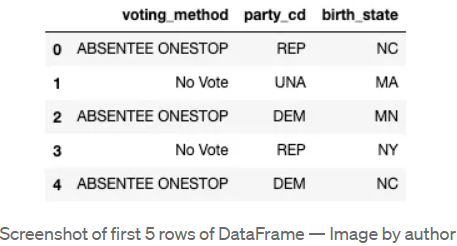

Si quieres empezar a aplicar estos métodos a tus propios proyectos, sólo tienes que asegurarte de que tienes instalados tanto NumPy como Pandas, y luego importar ambos.

## Using np.where() to Bin Categories

Uso de np.where() para agrupar categorías
Primero, veamos por qué elegí party_cd. La siguiente imagen muestra cuántos votantes individuales pertenecen a cada partido político.